In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import nengo
import numpy as np

In [177]:
model = nengo.Network(seed=1)
with model:
    people = nengo.Ensemble(n_neurons=300, dimensions=2,
                            neuron_type = nengo.LIFRate(),
                            radius=2)
    
    stim = nengo.Node([0.6,  # probability 
                       0.3  # value
                      ])
    
    decision = nengo.Node(None, size_in=1)
    nengo.Connection(stim, people)
    
    def decision_rule(x):
        expected_value = max(x[0],0)*x[1]
        if expected_value > 0.5:
            return 1
        else:
            return -1
    
    nengo.Connection(people, decision, function=decision_rule)
    
    def gossip(x):
        expected_value = max(x[0],0)*x[1]
        prob = x[0]
        if expected_value > 0.5:
            new_prob = prob + 0.5
        else:
            new_prob = max(prob - 0.5, 0)
        return new_prob, 0
    nengo.Connection(people, people, function=gossip, synapse=0.1)
    
    p_decision = nengo.Probe(decision, synapse=0.0)
    p_belief = nengo.Probe(people, synapse=0.0)
    
    

In [178]:
sim = nengo.Simulator(model)
with sim:
    sim.run(2.0)


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

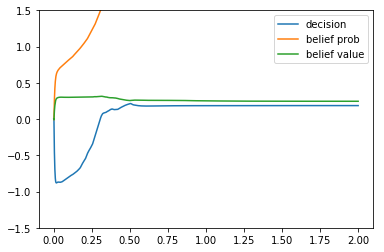

ERROR:nengo_gui.server:Error response
Traceback (most recent call last):
  File "c:\users\terry\documents\github\nengo_gui\nengo_gui\server.py", line 412, in do_GET
    self.http_GET()
  File "c:\users\terry\documents\github\nengo_gui\nengo_gui\guibackend.py", line 137, in http_GET
    server.HttpWsRequestHandler.http_GET(self)
  File "c:\users\terry\documents\github\nengo_gui\nengo_gui\server.py", line 428, in http_GET
    response = getattr(self, command)()
  File "c:\users\terry\documents\github\nengo_gui\nengo_gui\guibackend.py", line 86, in auth_checked
    return fn(inst)
  File "c:\users\terry\documents\github\nengo_gui\nengo_gui\guibackend.py", line 233, in serve_main
    page = self.server.create_page(filename, reset_cfg=reset_cfg)
  File "c:\users\terry\documents\github\nengo_gui\nengo_gui\guibackend.py", line 457, in create_page
    reset_cfg=reset_cfg)
  File "c:\users\terry\documents\github\nengo_gui\nengo_gui\page.py", line 114, in __init__
    self.load()
  File "c:\user

In [179]:
plt.plot(sim.trange(), sim.data[p_decision], label='decision')
plt.plot(sim.trange(), sim.data[p_belief][:,0], label='belief prob')
plt.plot(sim.trange(), sim.data[p_belief][:,1], label='belief value')
plt.ylim(-1.5, 1.5)
plt.legend()

In [128]:
import nengo_gui.ipython
nengo_gui.ipython.IPythonViz(model)